# Proyecto analisis de datos

In [15]:
#1. Importación de Librerias y Configuración

# Importación de librerías esenciales
import pandas as pd      # Para la manipulación y análisis de datos
import numpy as np       # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para la generación de gráficos
import seaborn as sns    # Para visualización de datos con estilos predefinidos

# Configuración de estilo para gráficos
sns.set(style="whitegrid", palette="muted", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño predeterminado de las figuras

In [9]:
#2. Carga de Datos y Exploración Inicial
ruta_energias = 'dataset.csv'

# Cargar el dataset utilizando Pandas
# Attempt to read the CSV file while handling potential errors
df_energias = pd.read_csv("dataset.csv", sep=";")

# Mostrar las primeras filas de cada DataFrame para confirmar la carga
print("Primeras filas del dataset de Energías:")
display(df_energias.head())

#Mostrar las ultimas filas de cada DataFrame para confirmar la carga
print("Ultimas filas del dataset de Energías:")
display(df_energias.tail())

# información general (tipos de datos, cantidad de registros, etc.)
print("Información del dataset de Energías:")
print(df_energias.info())

#verificación de los tipos de datos 
print("Tipos de datos del dataset de Energías:")
print(df_energias.dtypes) 

#verificación de valores nulos
print("Valores nulos del dataset de Energías:")
print(df_energias.isnull().sum())

#verificación de valores duplicados
print("Valores duplicados del dataset de Energías:")        
print(df_energias.duplicated().sum())

Primeras filas del dataset de Energías:


,Series Name,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,"Access to electricity, rural (% of rural popul...",Algeria,"97,4","97,4","97,4","97,4","97,4","97,4","97,4","97,4","97,9","97,4","97,5","97,6","97,7","97,8","97,9","98,1"
1,"Access to electricity, rural (% of rural popul...",Argentina,"91,8","88,6","92,6","92,9","93,2","93,4","93,6","93,8",94,"94,2","98,6","97,8","96,1","95,4",100,"97,6"
2,"Access to electricity, rural (% of rural popul...",Australia,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
3,"Access to electricity, rural (% of rural popul...",Bolivia,"28,2",28,"22,5",35,"40,3","29,5","41,6","46,5",57,"63,3","66,4","66,6","72,2","68,5","70,3","74,3"
4,"Access to electricity, rural (% of rural popul...",Brazil,"74,6","81,9","84,1","85,3","83,5","84,8","87,2","89,8","91,9","93,6","92,1","96,2","97,2","97,5","97,9","98,2"


Ultimas filas del dataset de Energías:


,Series Name,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
695,Access to electricity (% of population),Spain,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
696,Access to electricity (% of population),United Kingdom,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
697,Access to electricity (% of population),United Arab Emirates,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
698,Access to electricity (% of population),United States,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
699,Access to electricity (% of population),"Venezuela, RB","98,9","99,9","99,8","95,7","99,1","98,8","99,3","98,9","98,9",99,"99,1","98,8","99,3","99,4",100,100


Información del dataset de Energías:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   700 non-null    object
 1   Country Name  700 non-null    object
 2   2000          700 non-null    object
 3   2001          699 non-null    object
 4   2002          699 non-null    object
 5   2003          700 non-null    object
 6   2004          700 non-null    object
 7   2005          700 non-null    object
 8   2006          700 non-null    object
 9   2007          700 non-null    object
 10  2008          700 non-null    object
 11  2009          699 non-null    object
 12  2010          699 non-null    object
 13  2011          700 non-null    object
 14  2012          700 non-null    object
 15  2013          700 non-null    object
 16  2014          698 non-null    object
 17  2015          604 non-null    object
dtypes: object(18)

In [10]:
# 3. Limpieza de Datos

# Paso 3.1: Convertir las columnas de años en valores numéricos
# Asumiendo que tus columnas de años van de 2000 a 2015
cols_years = [str(year) for year in range(2000, 2016)]

for col in cols_years:
    # Reemplazar comas por puntos y convertir a float
    df_energias[col] = df_energias[col].str.replace(",", ".").astype(float)

# Paso 3.2: Eliminar registros duplicados
df_energias.drop_duplicates(inplace=True)

# Paso 3.3: Rellenar valores nulos con la media (solo en columnas numéricas)
df_energias[cols_years] = df_energias[cols_years].apply(
    lambda col: col.fillna(col.mean())
)

# Paso 3.4: Verificar que no haya valores nulos ni duplicados
print("Valores nulos del dataset de Energías:")
print(df_energias.isnull().sum())

print("\nValores duplicados del dataset de Energías:")
print(df_energias.duplicated().sum())


Valores nulos del dataset de Energías:
Series Name     0
Country Name    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
dtype: int64

Valores duplicados del dataset de Energías:
0


Media general de consumo energético en Oceanía: 174388435608.25955
Media general de consumo energético en Sudamérica: 5102662053746.868
Media general de consumo energético en Norteamérica: 753415519091.9517
Media general de consumo energético en Europa: 633129094467.2727
Media general de consumo energético en Asia: 132337133092029.14
Media general de consumo energético en África: 1114398519221.1294


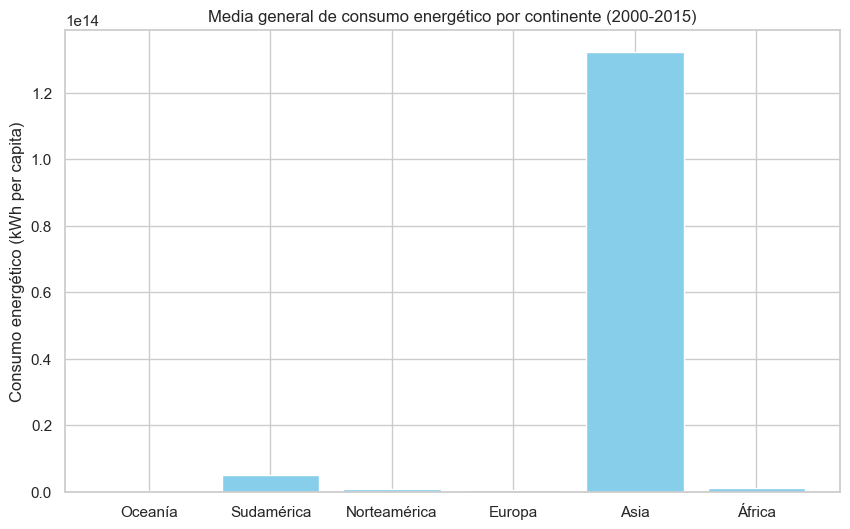

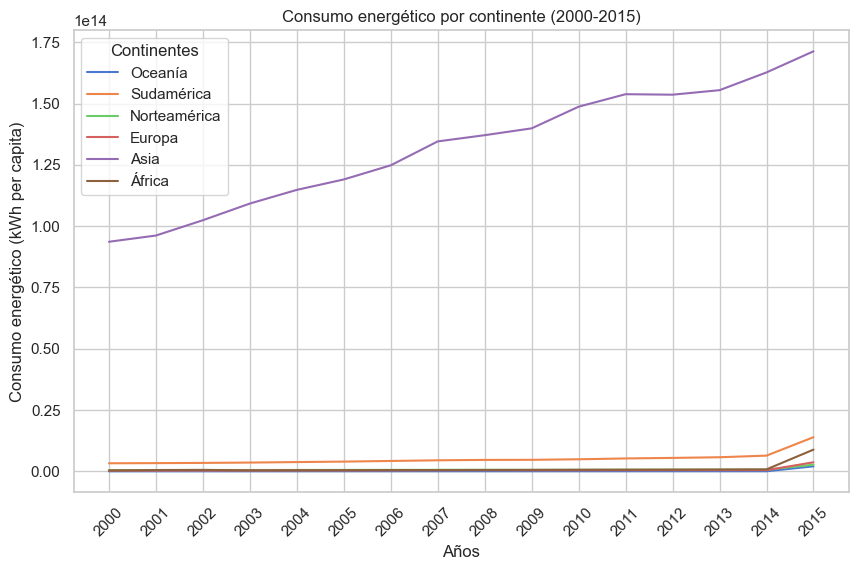

In [11]:
# objetivo especifico 1: Identificar las regiones (continentes) con mayor y menor consumo energético, evaluando su evolución en el período 2000-2015.
# Diccionario que asigna cada país a su continente
continent_map = {
    "Algeria": "Africa",
    "Argentina": "South America",
    "Australia": "Oceania",
    "Bolivia": "South America",
    "Brazil": "South America",
    "Canada": "North America",
    "Colombia": "South America",
    "Chile": "South America",
    "Ecuador": "South America",
    "Ethiopia": "Africa",
    "Egypt, Arab Rep.": "Africa",
    "France": "Europe",
    "Germany": "Europe",
    "India": "Asia",
    "Iran, Islamic Rep.": "Asia",
    "Iraq": "Asia",
    "Indonesia": "Asia",
    "Italy": "Europe",
    "Japan": "Asia",
    "Mexico": "North America",
    "Morocco": "Africa",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nigeria": "Africa",
    "Norway": "Europe",
    "Peru": "South America",
    "Poland": "Europe",
    "Romania": "Europe",
    "Russian Federation": "Europe",
    "Saudi Arabia": "Asia",
    "Spain": "Europe",
    "United Kingdom": "Europe",
    "United Arab Emirates": "Asia",
    "United States": "North America",
    "Venezuela, RB": "South America"
}
# Crear la columna 'Continent' en el DataFrame principal
df_energias["Continent"] = df_energias["Country Name"].map(continent_map)

africa_df = df_energias[df_energias["Continent"] == "Africa"]
asia_df = df_energias[df_energias["Continent"] == "Asia"]
europe_df = df_energias[df_energias["Continent"] == "Europe"]
north_america_df = df_energias[df_energias["Continent"] == "North America"]
south_america_df = df_energias[df_energias["Continent"] == "South America"]
oceania_df = df_energias[df_energias["Continent"] == "Oceania"]

years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
         '2009', '2010', '2011', '2012', '2013', '2014', '2015']

def media_general_por_continente(df, years):
    mean_list = []  # Lista para almacenar las medias

    for year in years:
        if year in df.columns:  # Asegurarse de que la columna exista
            mean_value = df[year].mean()
            mean_list.append(mean_value)  # Agregar el valor a la lista

    # Calcular la media general
    if mean_list:  # Verificar que la lista no esté vacía
        general_mean = sum(mean_list) / len(mean_list)

        return general_mean

#Halla la media general de consumo energético en cada continente

oceania_mean = media_general_por_continente(oceania_df, years)
print("Media general de consumo energético en Oceanía:", oceania_mean)

south_america_mean = media_general_por_continente(south_america_df, years)
print("Media general de consumo energético en Sudamérica:", south_america_mean)

north_america_mean = media_general_por_continente(north_america_df, years)
print("Media general de consumo energético en Norteamérica:", north_america_mean)

europe_mean = media_general_por_continente(europe_df, years)
print("Media general de consumo energético en Europa:", europe_mean)

asia_mean = media_general_por_continente(asia_df, years)
print("Media general de consumo energético en Asia:", asia_mean)

africa_mean = media_general_por_continente(africa_df, years)
print("Media general de consumo energético en África:", africa_mean)

#Grafico de barras de la media general de consumo energético por continente
plt.figure(figsize=(10, 6))
plt.bar(["Oceanía", "Sudamérica", "Norteamérica", "Europa", "Asia", "África"],
        [oceania_mean, south_america_mean, north_america_mean, europe_mean, asia_mean, africa_mean],
        color="skyblue")

plt.title("Media general de consumo energético por continente (2000-2015)")
plt.ylabel("Consumo energético (kWh per capita)")
plt.show()


import matplotlib.pyplot as plt

# Función para graficar el consumo energético por continente
def graficar_consumo_energetico(df, years):
    plt.figure(figsize=(10, 6))
    
    # Graficar la media del consumo energético por continente para cada año
    for continent, continent_df in {
        "Oceanía": oceania_df,
        "Sudamérica": south_america_df,
        "Norteamérica": north_america_df,
        "Europa": europe_df,
        "Asia": asia_df,
        "África": africa_df
    }.items():
        consumption = []
        for year in years:
            if year in continent_df.columns:
                # Calcular la media de consumo energético de todos los países del continente para el año
                mean_value = continent_df[year].mean()
                consumption.append(mean_value)
        plt.plot(years, consumption, label=continent)
    
    plt.title("Consumo energético por continente (2000-2015)")
    plt.xlabel("Años")
    plt.ylabel("Consumo energético (kWh per capita)")
    plt.legend(title="Continentes")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Llamar a la función para graficar los datos
graficar_consumo_energetico(df_energias, years)



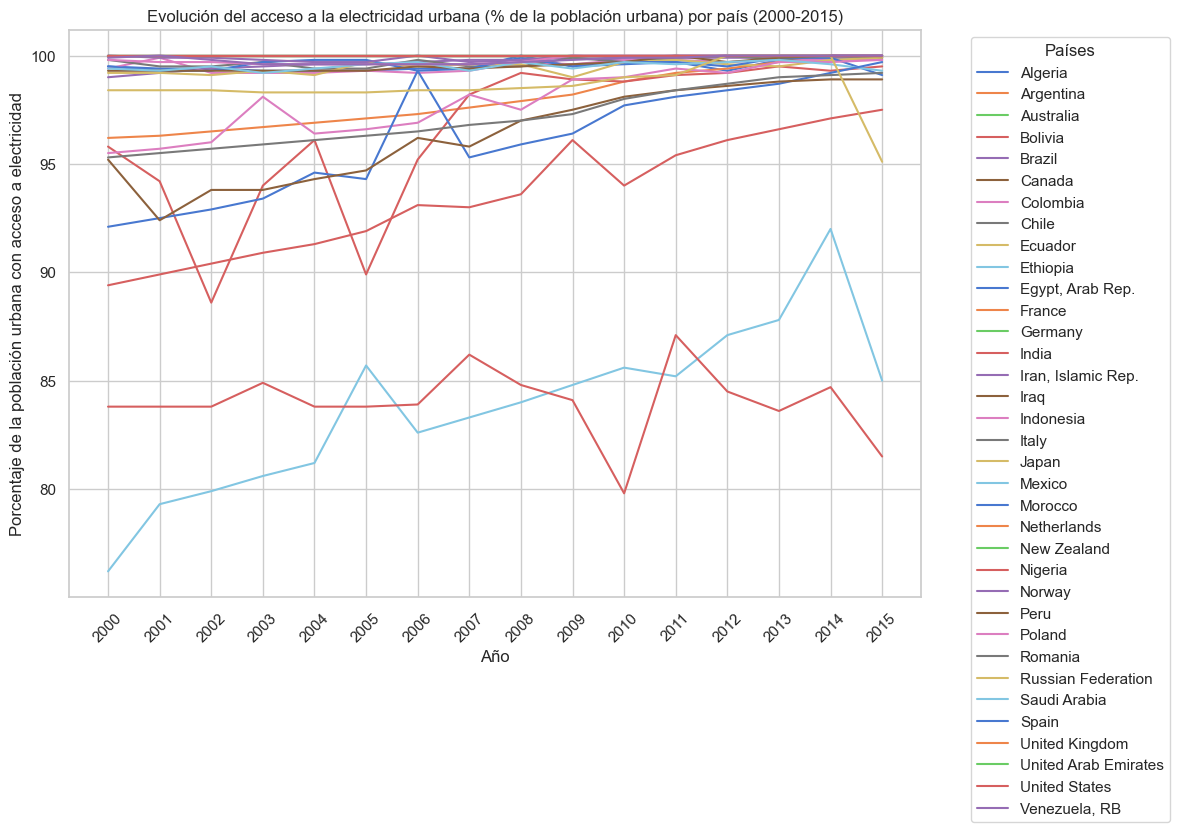

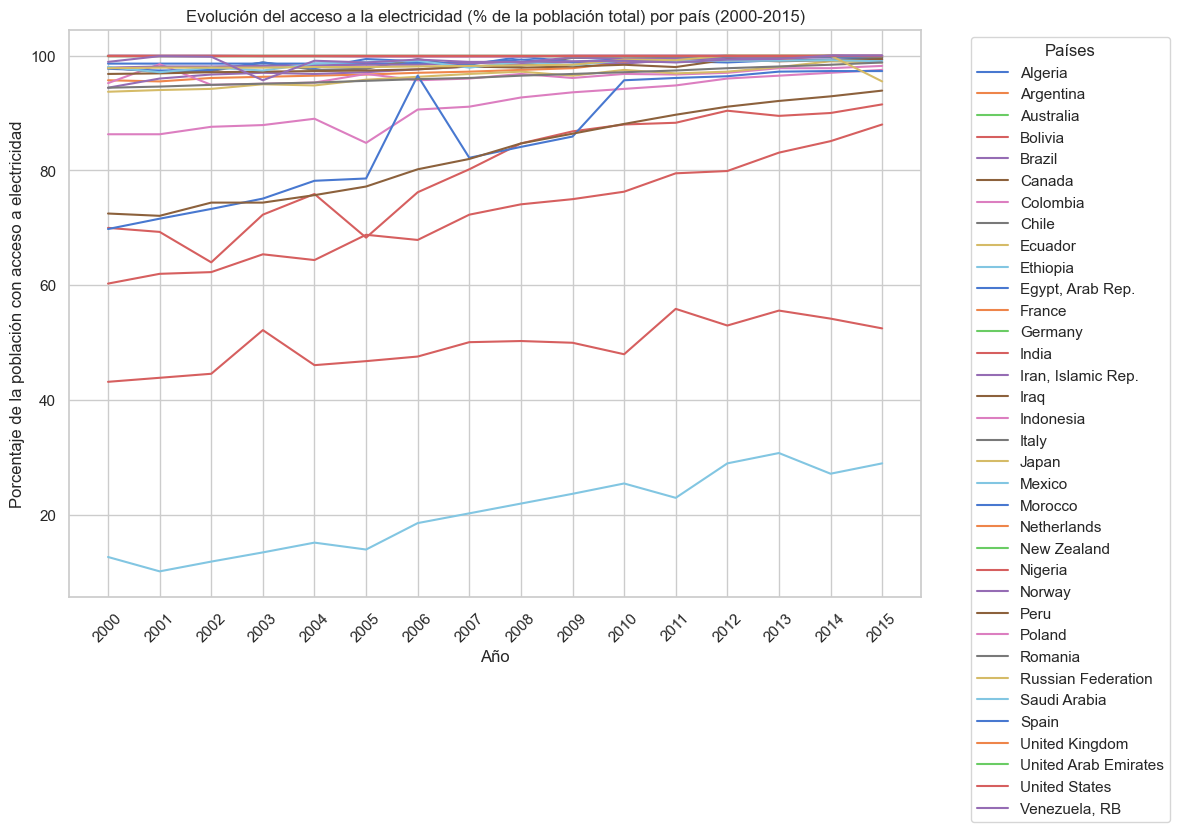

In [12]:
# Filtrar los datos para la serie "Access to electricity, urban (% of urban population)"
acceso_electricidad_urbana_df = df_energias[df_energias["Series Name"] == "Access to electricity, urban (% of urban population)"]

# Graficar la evolución de la variable "Access to electricity, urban" por país a lo largo de los años
plt.figure(figsize=(12, 8))
for country in acceso_electricidad_urbana_df["Country Name"]:
    country_data = acceso_electricidad_urbana_df[acceso_electricidad_urbana_df["Country Name"] == country]
    plt.plot(cols_years, country_data[cols_years].values.flatten(), label=country)

plt.title("Evolución del acceso a la electricidad urbana (% de la población urbana) por país (2000-2015)")
plt.xlabel("Año")
plt.ylabel("Porcentaje de la población urbana con acceso a electricidad")
plt.xticks(rotation=45)
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filtrar los datos para la serie "Access to electricity (% of population)"
acceso_electricidad_total_df = df_energias[df_energias["Series Name"] == "Access to electricity (% of population)"]

# Graficar la evolución de la variable "Access to electricity" por país a lo largo de los años
plt.figure(figsize=(12, 8))
for country in acceso_electricidad_total_df["Country Name"]:
    country_data = acceso_electricidad_total_df[acceso_electricidad_total_df["Country Name"] == country]
    plt.plot(cols_years, country_data[cols_years].values.flatten(), label=country)

plt.title("Evolución del acceso a la electricidad (% de la población total) por país (2000-2015)")
plt.xlabel("Año")
plt.ylabel("Porcentaje de la población con acceso a electricidad")
plt.xticks(rotation=45)
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


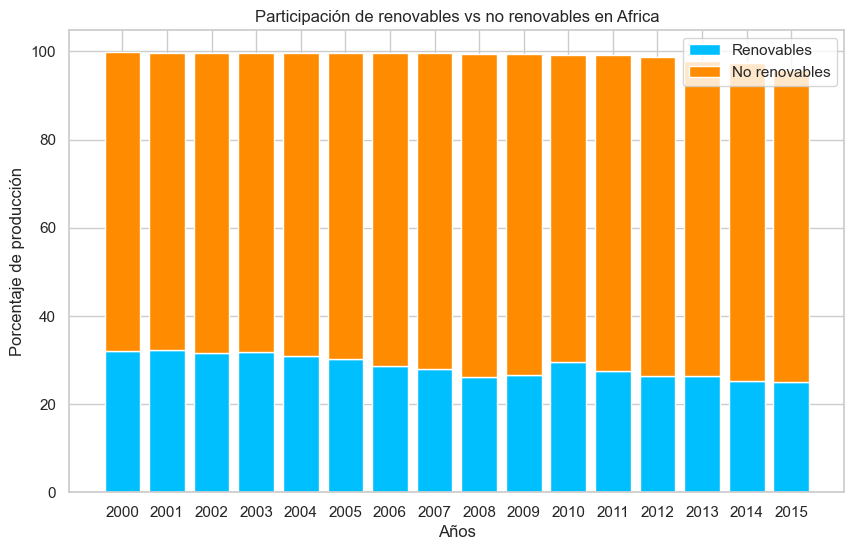

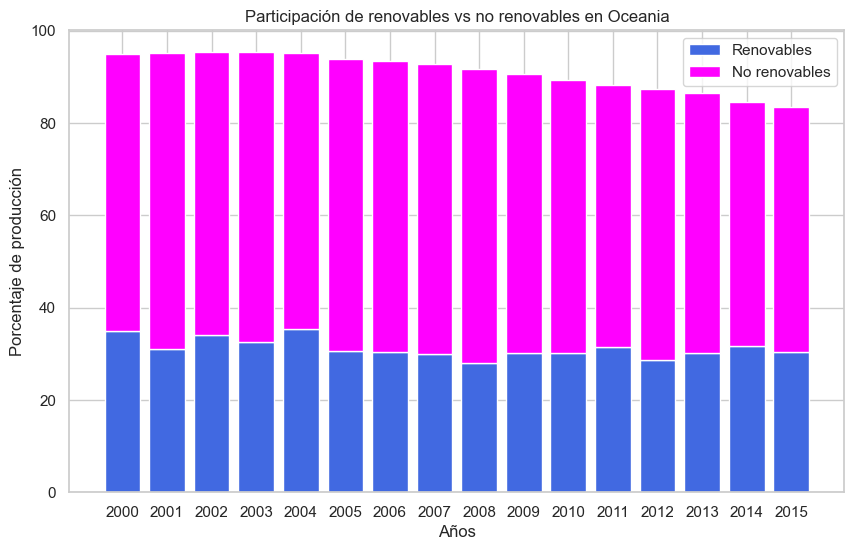

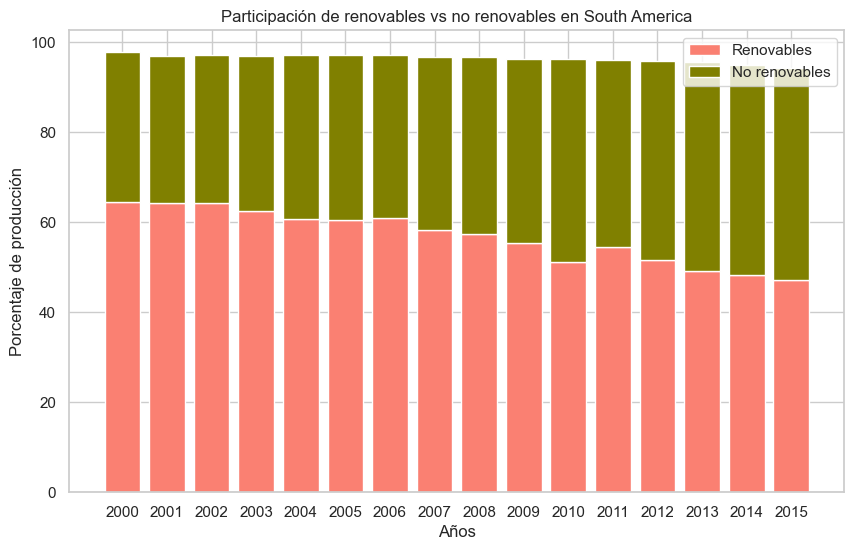

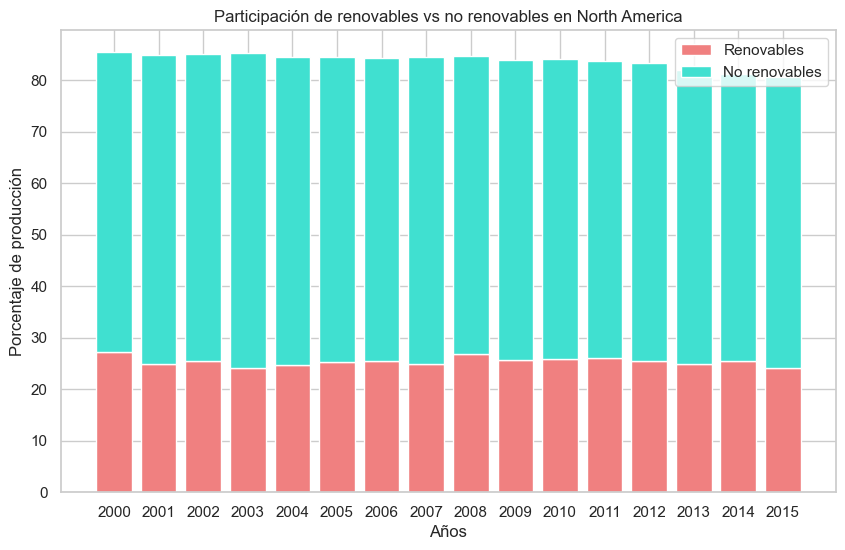

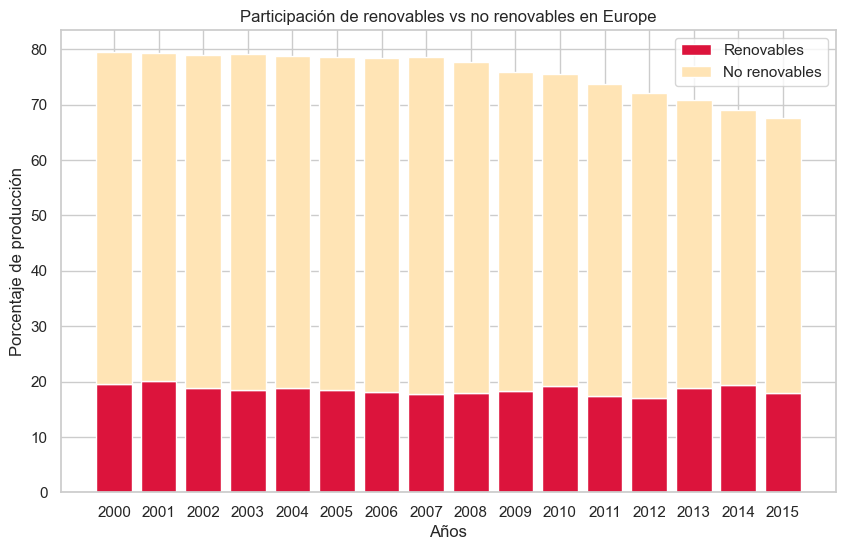

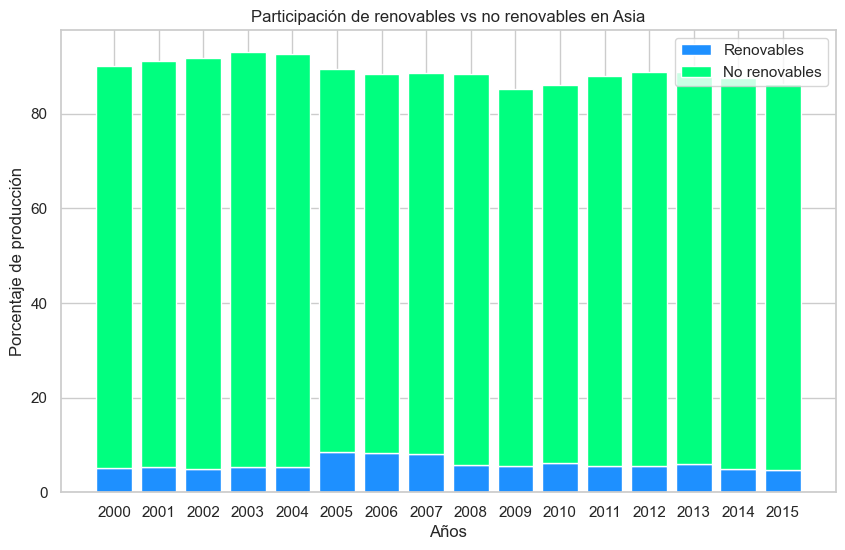

In [13]:
# objetivo especifico 2: Analizar la participación de las fuentes renovables frente a las energías no renovables (electricity production from oil, gas and coal sources (% of total)) en la producción de electricidad en diferentes países.

# Seleccionar las columnas relevantes para el análisis

energias_hidro = pd.read_excel("dataset_variables.xlsx", sheet_name="ElectricityProductionHidro(%)")
energias_oil = pd.read_excel("dataset_variables.xlsx", sheet_name="ElectricityProductionOilGas(%)")

# Eliminar espacios en los nombres de las columnas
energias_hidro.columns = energias_hidro.columns.astype(str).str.strip()
energias_oil.columns = energias_oil.columns.astype(str).str.strip()


def get_regional_datasets(df, continent):
    df["Continent"] = df["Country Name"].map(continent_map)
    df_continent = df[df["Continent"] == continent]
    
    if df_continent.empty:
        raise ValueError(f"No hay datos disponibles para el continente: {continent}")
    
    return df_continent



def plot_renewable_vs_oil(dataset_hidro, dataset_oil, years, continent,color1,color2):
    dataset_hidro_continent = get_regional_datasets(dataset_hidro, continent)
    dataset_oil_continent = get_regional_datasets(dataset_oil, continent)

    # Calcular las medias de cada dataset para cada año
    renewable_means = [dataset_hidro_continent[year].mean() for year in years]
    non_renewable_means = [dataset_oil_continent[year].mean() for year in years]

    # imprimir el gráfico de barras apiladas
    plt.bar(years, renewable_means, label="Renovables", color=color1)
    plt.bar(years, non_renewable_means, bottom=renewable_means, label="No renovables", color=color2)
    plt.xlabel("Años")
    plt.ylabel("Porcentaje de producción")
    plt.title(f"Participación de renovables vs no renovables en {continent}")
    plt.legend()
    plt.show()

plot_renewable_vs_oil(energias_hidro,energias_oil,years,"Africa","deepskyblue","darkorange")

plot_renewable_vs_oil(energias_hidro,energias_oil,years,"Oceania","royalblue","magenta")

plot_renewable_vs_oil(energias_hidro,energias_oil,years,"South America","salmon","olive")

plot_renewable_vs_oil(energias_hidro,energias_oil,years,"North America","lightcoral","turquoise")

plot_renewable_vs_oil(energias_hidro,energias_oil,years,"Europe","crimson","moccasin")

plot_renewable_vs_oil(energias_hidro,energias_oil,years,"Asia","dodgerblue","springgreen")

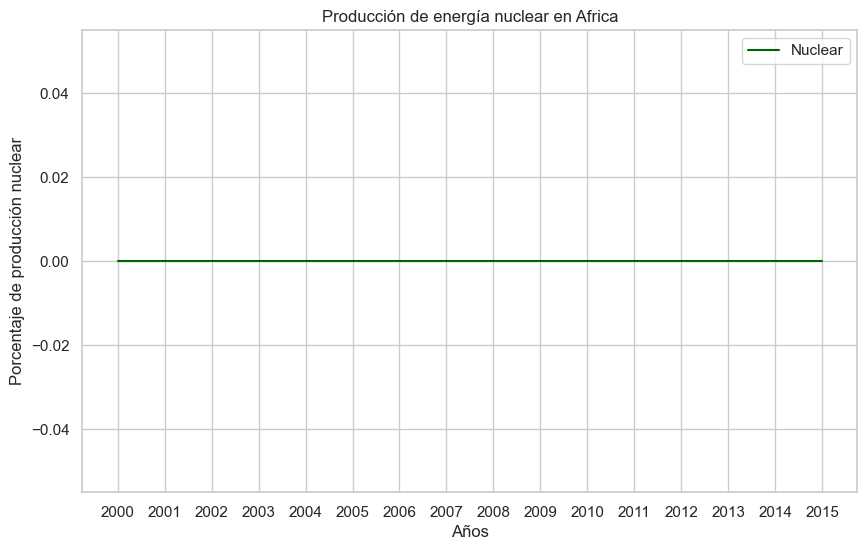

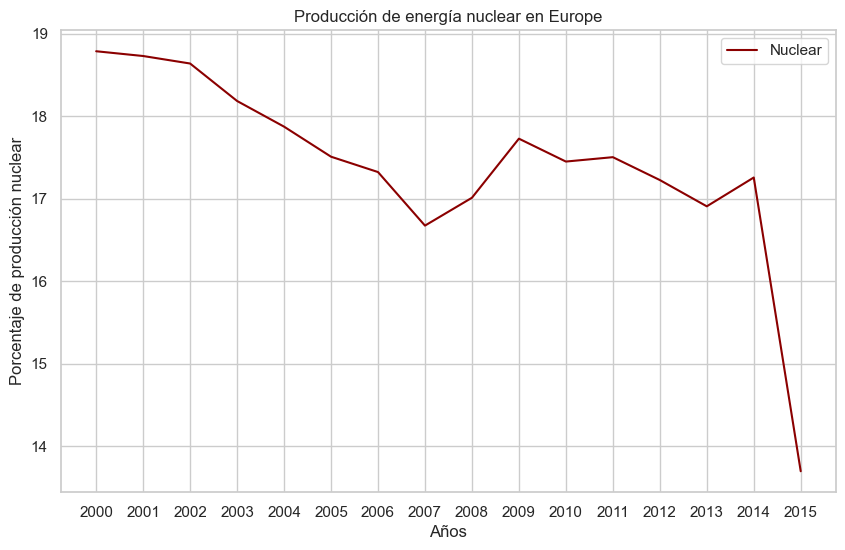

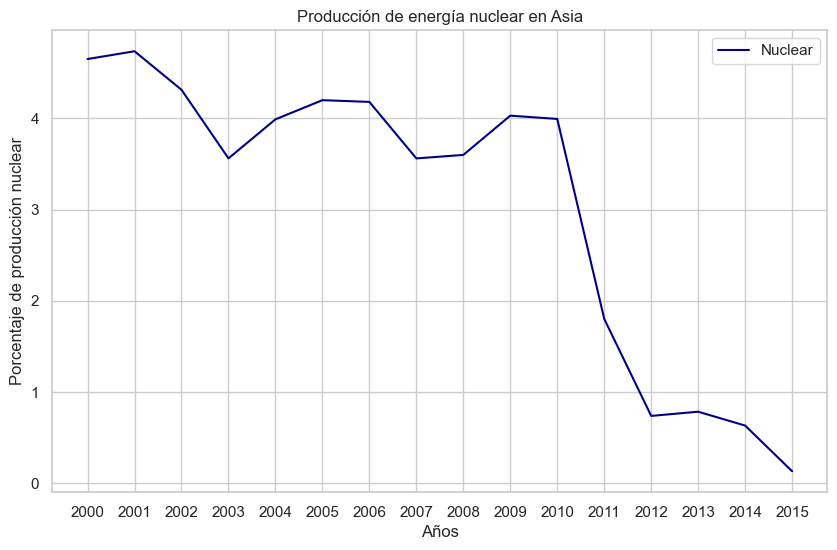

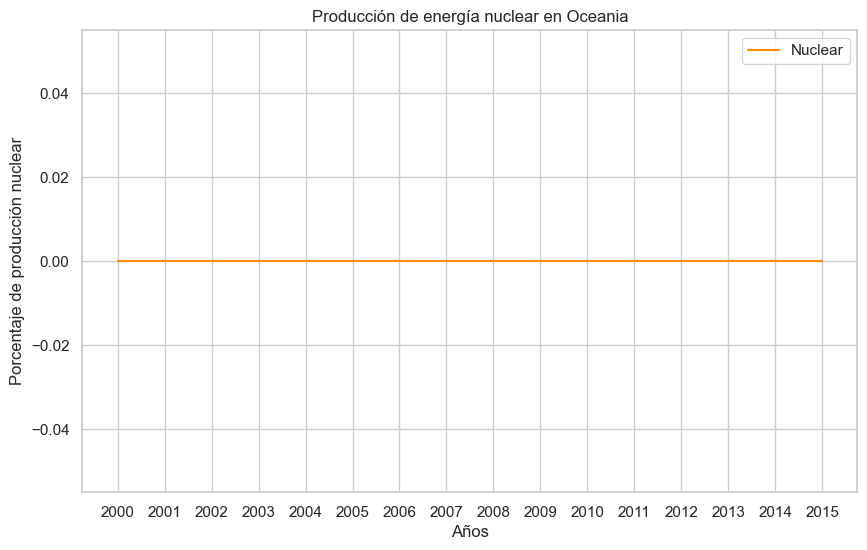

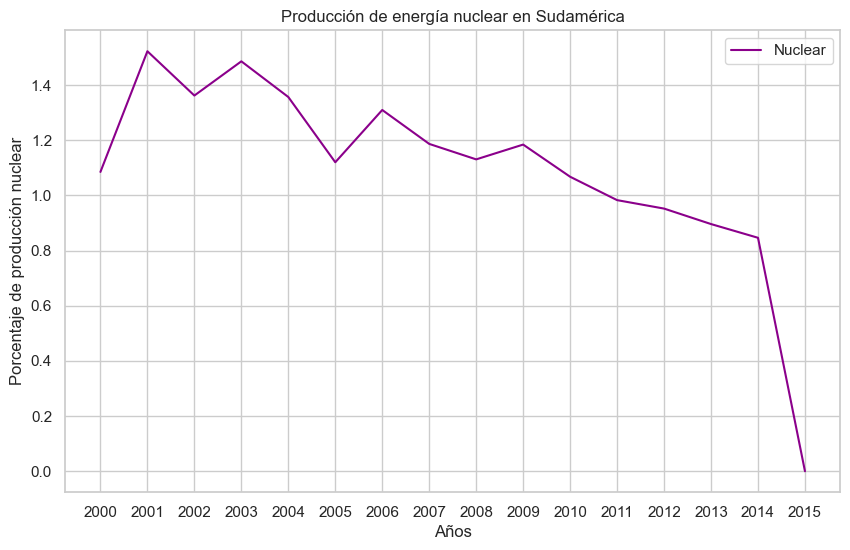

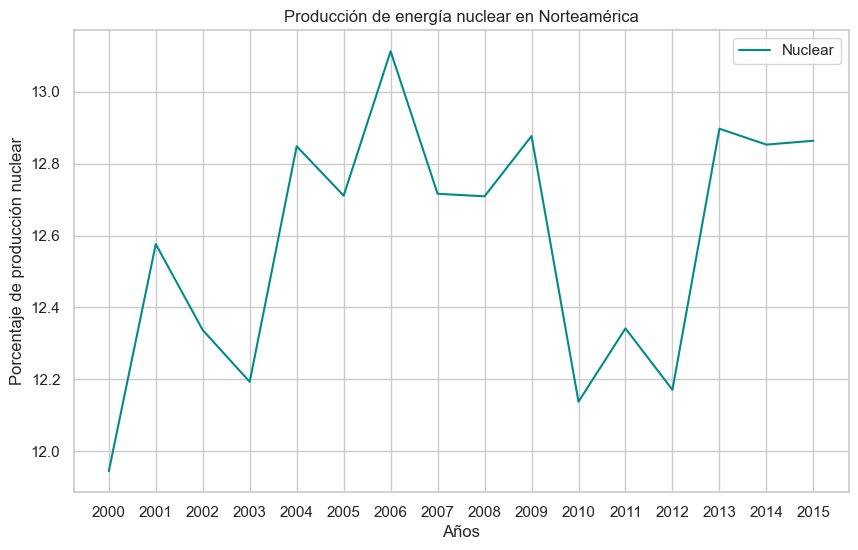

In [14]:
# Objetivo específico 4: Evaluar la evolución de la producción de energía nuclear en diferentes regiones (continentes) durante el período 2000-2015.
# 1. Seleccionar las columnas de interés para el análisis 

nuclear_dataset=pd.read_excel("dataset_variables.xlsx",sheet_name="ElectricityProductionNuclear(%)")

nuclear_dataset.fillna(0, inplace=True)


def nuclear_region_development(dataset,years,color,continente):

    nuclear_form=[dataset[year].mean() for year in years]

    plt.plot(years,nuclear_form,label="Nuclear",color=color)
    plt.xlabel("Años")
    plt.ylabel("Porcentaje de producción nuclear")
    plt.title(f"Producción de energía nuclear en {continente}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Ensure column names are strings and strip any leading/trailing spaces
nuclear_africa = get_regional_datasets(nuclear_dataset, "Africa")
nuclear_africa.columns = nuclear_africa.columns.astype(str).str.strip()

nuclear_region_development(nuclear_africa, years, "darkgreen", "Africa")

nuclear_europe = get_regional_datasets(nuclear_dataset, "Europe")
nuclear_europe.columns = nuclear_europe.columns.astype(str).str.strip()

nuclear_region_development(nuclear_europe, years, "darkred", "Europe")

nuclear_asia = get_regional_datasets(nuclear_dataset, "Asia")
nuclear_asia.columns = nuclear_asia.columns.astype(str).str.strip()

nuclear_region_development(nuclear_asia, years, "darkblue", "Asia")

nuclear_oceania = get_regional_datasets(nuclear_dataset, "Oceania")
nuclear_oceania.columns = nuclear_oceania.columns.astype(str).str.strip()

nuclear_region_development(nuclear_oceania, years, "darkorange", "Oceania")

nuclear_south_america = get_regional_datasets(nuclear_dataset, "South America")
nuclear_south_america.columns = nuclear_south_america.columns.astype(str).str.strip()

nuclear_region_development(nuclear_south_america, years, "darkmagenta", "Sudamérica")

nuclear_north_america = get_regional_datasets(nuclear_dataset, "North America")
nuclear_north_america.columns = nuclear_north_america.columns.astype(str).str.strip()

nuclear_region_development(nuclear_north_america, years, "darkcyan", "Norteamérica")